# SI Carpentries Brownbag: Palmer penguins
https://github.com/SmithsonianWorkshops/carpentries-brown-bag/tree/master/2020-08-26-penguins

"*This month we are tackling another dataset provided by the Tidy Tuesday project: a dataset on Antarctic penguins. This dataset contains measurements on bill length, bill depth, flipper length, body mass, sex, and year for three species found on three islands in the Palmer Archipelago, Antarctica.*

*A link to the Tidy Tuesday writeup and instructions can be found here: https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-07-28/readme.md* "

In [10]:
import pandas as pd
import plotnine as p9

In [11]:
penguins = pd.read_csv('https://raw.githubusercontent.com/SmithsonianWorkshops/carpentries-brown-bag/master/2020-08-26-penguins/penguins.csv')

In [12]:
penguins_raw = pd.read_csv('https://raw.githubusercontent.com/SmithsonianWorkshops/carpentries-brown-bag/master/2020-08-26-penguins/penguins_raw.csv')

### Create new dataframe with selected columns (Delta 15 N (o/oo), Delta 13 C (o/oo), Sex, Species, and Island) and remove rows with null values


In [13]:
penguins_subset = penguins_raw[['Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Sex', 'Species', 'Island']]
penguins_subset.isnull().sum()

Delta 15 N (o/oo)    14
Delta 13 C (o/oo)    13
Sex                  11
Species               0
Island                0
dtype: int64

In [14]:
penguins_subset_no_null = penguins_subset.dropna()
penguins_subset_no_null.head(10)

,Delta 15 N (o/oo),Delta 13 C (o/oo),Sex,Species,Island
1,8.94956,-24.69454,FEMALE,Adelie Penguin (Pygoscelis adeliae),Torgersen
2,8.36821,-25.33302,FEMALE,Adelie Penguin (Pygoscelis adeliae),Torgersen
4,8.76651,-25.32426,FEMALE,Adelie Penguin (Pygoscelis adeliae),Torgersen
5,8.66496,-25.29805,MALE,Adelie Penguin (Pygoscelis adeliae),Torgersen
6,9.18718,-25.21799,FEMALE,Adelie Penguin (Pygoscelis adeliae),Torgersen
7,9.46060,-24.89958,MALE,Adelie Penguin (Pygoscelis adeliae),Torgersen
14,8.55583,-25.22588,MALE,Adelie Penguin (Pygoscelis adeliae),Torgersen
16,9.18528,-25.06691,FEMALE,Adelie Penguin (Pygoscelis adeliae),Torgersen
17,8.67538,-25.13993,MALE,Adelie Penguin (Pygoscelis adeliae),Torgersen
18,8.47827,-25.23319,FEMALE,Adelie Penguin (Pygoscelis adeliae),Torgersen


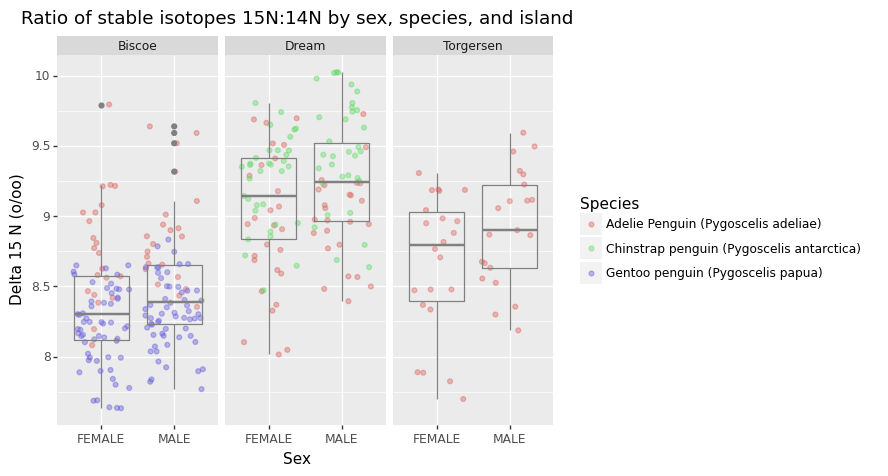

<ggplot: (304704729)>

In [15]:
plotN = (p9.ggplot(data = penguins_subset_no_null,
          mapping = p9.aes(x = 'Sex',
                           y = 'Delta 15 N (o/oo)',
                           color = 'Species'))
 + p9.geom_jitter(alpha=0.4)
 + p9.geom_boxplot(alpha=0.05, color = 'grey')
 + p9.facet_wrap('Island')
 + p9.labels.ggtitle('Ratio of stable isotopes 15N:14N by sex, species, and island'))

plotN

*Note: I'm not sure how to override the gray colors on the outliers of the boxplots*

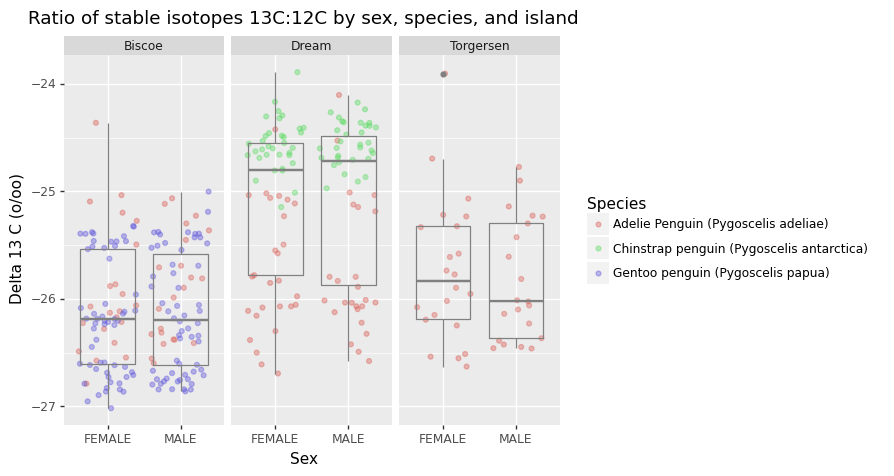

<ggplot: (312407321)>

In [16]:
plotC = (p9.ggplot(data = penguins_subset_no_null,
          mapping = p9.aes(x = 'Sex',
                           y = 'Delta 13 C (o/oo)',
                           color = 'Species'))
 + p9.geom_jitter(alpha=0.4)
 + p9.geom_boxplot(alpha=0.05, color = 'grey')
 + p9.facet_wrap('Island')
 + p9.labels.ggtitle('Ratio of stable isotopes 13C:12C by sex, species, and island'))

plotC

### Save plots to files

In [17]:
plotN.save('Penguin_nitrogen.png', width = 15, height = 10, dpi = 300)
plotC.save('Penguin_carbon.png', width = 15, height = 10, dpi = 300)

/Users/carriecraig/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 15 x 10 in image.
/Users/carriecraig/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: Penguin_nitrogen.png
/Users/carriecraig/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 15 x 10 in image.
/Users/carriecraig/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: Penguin_carbon.png


### Conclusions

Stable isotope ratios can shed light on the diet of an organism. In a study on $penguins^{1}$, the ratio of 15N:14N was used as an indicator of prey trophic level, while the ratio of 13C:12C was used as an indicator of latitude of foraging location. Higher 15N:14N ratios indicated penguins were feeding at a higher trophic level (i.e. fish) and lower ratios indicated penguins were feeding at a lower trophic level (i.e. krill). In the same study, higher latitudes correlated with lower 13C:12C ratios. In the Tidy Tuesday dataset, the following patterns emerged:

- There were no large differences in isotope ratios between sex. The 15N:14N ratios were slightly higher in males than females.
- Some differences in isotope ratios among species emerged: for both 15N:14N and 13C:12C the Chinstrap penguins tended to have higher levels than the other two species, and the Gentoo penguin tended to have lower levels. This suggests Chinstrap penguins tended to feed at higher trophic levels and lower latitudes, while Gentoo penguins and Adelie penguins tended to feed at relatively lower trophic levels and higher latitudes
- Finally, Adelie penguins were observed on all three islands (Biscoe, Dream, and Torgersen Islands), Gentoo penguins were observed only on Biscoe Island, and Chinstrap penguins were observed only on Dream Island.

(1) STRICKLAND, MARY E., MICHAEL POLITO, and STEVEN D. EMSLIE. "Spatial and seasonal variation in Adélie penguin diet as inferred from stable isotope analysis of eggshell." Journal of the North Carolina Academy of Science (2008): 65-71.